In [1]:
import pandas as pd
import numpy as np
all_complexes_path = 'allComplexes.txt'

In [2]:
df = pd.read_csv(all_complexes_path,sep='\t')
df.head()

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name),Subunits comment,PubMed ID,Complex comment,Disease comment,SWISSPROT organism,subunits(Gene name syn),subunits(Protein name)
0,1,BCL6-HDAC4 complex,Human,None,None,P41182;P56524,604;9759,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC4,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;KIAA0288,B-cell lymphoma 6 protein;Histone deacetylase 4
1,2,BCL6-HDAC5 complex,Human,None,None,P41182;Q9UQL6,604;10014,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC5,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;KIAA0600,B-cell lymphoma 6 protein;Histone deacetylase 5
2,3,BCL6-HDAC7 complex,Human,None,None,P41182;Q8WUI4,604;51564,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC7,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;HDAC7A,B-cell lymphoma 6 protein;Histone deacetylase 7
3,4,Multisubunit ACTR coactivator complex,Human,None,None,Q09472;Q92793;Q92831;Q9Y6Q9,2033;1387;8850;8202,MI:0004-affinity chromatography technologies;M...,GO:0045893;GO:0023052;GO:0005634,"positive regulation of transcription, DNA-temp...",11.02.03.04.01;30.01;70.10,transcription activation;cellular signalling;n...,EP300;CREBBP;KAT2B;NCOA3,None,9267036,Cofactor ACTR binds directly nuclear receptors...,None,Homo sapiens (Human);Homo sapiens (Human);Homo...,"P300;CBP;PCAF;AIB1, BHLHE42, RAC3, TRAM1, ACTR",Histone acetyltransferase p300;CREB-binding pr...
4,9,6S-nuclear aryl hydrocarbon (Ah) receptor liga...,Mouse,None,None,P30561;P53762,11622;11863,MI:0019- coimmunoprecipitation,GO:2001141;GO:0006355;GO:0003677;GO:0023052;GO...,regulation of RNA biosynthetic process;regulat...,11.02.03.04;16.03.01;30.01;34.11.03;70.10,transcriptional control;DNA binding;cellular s...,Ahr;Arnt,None,1317062,"Arnt contains a basic helix-loop-helix motif, ...",None,Mus musculus (Mouse);Mus musculus (Mouse),;None,Aryl hydrocarbon receptor ;Aryl hydrocarbon re...


In [3]:
human_df = df[df.Organism=='Human']
# human_df.head()
mouse_df = df[df.Organism=='Mouse']
# mouse_df.head()
pig_df = df[df.Organism=='Pig']
rat_df = df[df.Organism=='Rat']
bovine_df = df[df.Organism=='Bovine']
mammalia_df = df[df.Organism=='Mammalia']
rabit_df = df[df.Organism=='Rabbit']
dog_df = df[df.Organism=='Dog']
hamster_df = df[df.Organism=='Hamster']
mink_df = df[df.Organism=='MINK']

df.groupby('Organism')['ComplexID'].count()

Organism
Bovine        75
Dog           28
Hamster        8
Human       2916
MINK           1
Mammalia      95
Mouse        678
Pig            7
Rabbit        18
Rat          448
Name: ComplexID, dtype: int64

In [36]:
human_hg = {}
vertex_set = set()
complex_names_unique = set()
for index, row in human_df.iterrows():
#     print(row)
    if row['ComplexName'] not in complex_names_unique:
        complex_names_unique.add(row['ComplexName'])
        edge_id = int(row['ComplexID'])
        proteins = row['subunits(Gene name)']
        assert edge_id not in human_hg
        _lst = proteins.split(';')
        if len(_lst)>1:
            human_hg[edge_id] = _lst
            vertex_set = vertex_set.union(human_hg[edge_id])

In [37]:
print('#vertex: ',len(vertex_set),' #edge: ',len(human_hg))

#vertex:  3622  #edge:  2611


In [38]:
vertex_list = sorted(list(vertex_set))
vid_to_genename_map = {}
gene_to_vidmap = {}
for i in range(len(vertex_list)):
    gene_to_vidmap[vertex_list[i]] = i
    vid_to_genename_map[i] = vertex_list[i]

In [39]:
import pickle

def save_dict(a, fname = 'tmp.pickle'):
    with open(fname, 'wb') as handle:
        pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def load_dict(fname = 'tmp.pickle'):
    with open(fname, 'rb') as handle:
        b = pickle.load(handle)
        return b
    
def retrieve_gene_name(integer_id):
    _map = load_dict('vid_to_genename.map')
    if integer_id not in _map:
        return None
    return _map[integer_id]

def retrieve_list_gene_name(lst_integer_id):
    _map = load_dict('vid_to_genename.map')
    _tmp = []
    for integer_id in lst_integer_id:
        if integer_id not in _map:
            return None
        else:
            _tmp.append(_map[integer_id])
    return _tmp

def retrieve_stronglyinduced_complexes(lst_integer_id,human_hg):
    protein_complex_ids = []
    for key,value in human_hg.items():
        flag = True
        for u in value:
            if u not in lst_integer_id:
                flag = False
                break
        if flag:
            protein_complex_ids.append(key)
    return protein_complex_ids

def retrieve_weeklyinduced_complexes(lst_integer_id,human_hg):
    protein_complex_ids = []
    for key,value in human_hg.items():
        flag = True
        for u in value:
            if u in lst_integer_id:
                protein_complex_ids.append(key)
                break 
    return protein_complex_ids
def load_hg_ascsv(name):
    _list = []
    with open(name,'r') as f:
        for line in f:
            e = [int(i) for i in line.strip().split(',')]
            _list.append(e)
    return _list


In [40]:
save_dict(vid_to_genename_map,'vid_to_genename.map')
save_dict(gene_to_vidmap,'gene_to_vidmap.map')

In [41]:
human_hgfinal = {}
k = list(human_hg.keys())
for key in k:
    v_ids = [gene_to_vidmap[i] for i in human_hg[key]]
    human_hgfinal[key] = v_ids

In [42]:
with open('humancomplexes.hyp','w') as wf:
    for key, value in human_hgfinal.items():
        val = [str(i) for i in value]
        wf.write(','.join(val)+'\n')

Densest Subgraph Analysis
------

In [43]:
deg_d = '/Users/nus/Cpp-Coredecomp/densest_output/output/density/protein_deg.csv'
vol_d = '/Users/nus/Cpp-Coredecomp/densest_output/output/density/protein_nbr.csv'
deg_dhg = load_hg_ascsv(deg_d)
vol_dhg = load_hg_ascsv(vol_d)
nodes_degD = set()
for e in deg_dhg:
    for u in e:
        nodes_degD.add(u)

nodes_volD = set()
for e in vol_dhg:
    for u in e:
        nodes_volD.add(u)

print(len(nodes_degD),' ',len(nodes_volD))
print(len(deg_dhg),' ',len(vol_dhg))
# print(nodes_degD)
coreprotein_names = retrieve_list_gene_name(nodes_degD)
# print(coreprotein_names)
sub_complexes_degD = retrieve_stronglyinduced_complexes(coreprotein_names, human_hg)
print('degree-Densest sub-protein complexes: ')
print(sub_complexes_degD)
coreprotein_names = retrieve_list_gene_name(nodes_volD)
# print(coreprotein_names)
sub_complexes_volD = retrieve_stronglyinduced_complexes(coreprotein_names, human_hg)
print('volume-Densest sub-protein complexes: ')
print(sub_complexes_volD)

18   143
108   13
degree-Densest sub-protein complexes: 
[1612, 7014, 7015, 7016, 7017, 7018, 7019, 7020, 7021, 7022, 7023, 7024, 7025, 7026, 7027, 7028, 7031, 7032, 7033, 7034, 7035, 7036, 7037, 7059, 7060, 7061, 7066, 7067, 7068, 7069, 7070, 7071, 7072, 7073, 7074, 7075, 7076, 7077, 7078, 7079, 7080, 7081, 7082, 7083, 7084, 7085, 7086, 7087, 7088, 7089, 7090, 7092, 7093, 7094, 7095, 7096, 7097, 7143, 7144, 7145, 7147, 7148, 7149, 7150, 7152, 7153, 7155, 7156, 7160, 7161, 7162, 7163, 7164, 7165, 7166, 7167, 7168, 7169, 7170, 7171, 7172, 7173, 7174, 7175, 7176, 7177, 7178, 7179, 7187, 7188, 7189, 7193, 7194, 7195, 7199, 7201, 7202, 7203, 7204, 7205, 7206, 7207, 7208, 7209, 7210, 7211, 7212, 7213]
volume-Densest sub-protein complexes: 
[351, 763, 770, 774, 775, 1195, 1261, 1734, 1743, 2833, 6072, 6073, 6160]


In [44]:
deg_densestE = []
for e in deg_dhg:
    new_e = retrieve_list_gene_name(e)
    deg_densestE.append(new_e)
print(deg_densestE)

[['GNG2', 'GNB1', 'GNAS'], ['GNB1', 'GNAI1', 'GNGT1'], ['GNB2', 'GNAI1', 'GNGT1'], ['GNB3', 'GNAI1', 'GNGT1'], ['GNAI1', 'GNGT1', 'GNB4'], ['GNB5', 'GNAI1', 'GNGT1'], ['GNG2', 'GNB1', 'GNAI1'], ['GNG2', 'GNB2', 'GNAI1'], ['GNB3', 'GNG2', 'GNAI1'], ['GNG2', 'GNAI1', 'GNB4'], ['GNB5', 'GNG2', 'GNAI1'], ['GNB1', 'GNAI1', 'GNG3'], ['GNB2', 'GNAI1', 'GNG3'], ['GNB3', 'GNAI1', 'GNG3'], ['GNAI1', 'GNG3', 'GNB4'], ['GNB5', 'GNAI1', 'GNG3'], ['GNG4', 'GNB1', 'GNAI1'], ['GNG4', 'GNB2', 'GNAI1'], ['GNB3', 'GNG4', 'GNAI1'], ['GNG4', 'GNAI1', 'GNB4'], ['GNB5', 'GNG4', 'GNAI1'], ['GNB1', 'GNAI1', 'GNG5'], ['GNB2', 'GNAI1', 'GNG5'], ['GNB3', 'GNAI1', 'GNG5'], ['GNAI1', 'GNG5', 'GNB4'], ['GNB5', 'GNAI1', 'GNG5'], ['GNG7', 'GNB1', 'GNAI1'], ['GNG7', 'GNB2', 'GNAI1'], ['GNG7', 'GNB3', 'GNAI1'], ['GNG7', 'GNAI1', 'GNB4'], ['GNB5', 'GNG7', 'GNAI1'], ['GNB1', 'GNAI1', 'GNG8'], ['GNB2', 'GNAI1', 'GNG8'], ['GNB3', 'GNAI1', 'GNG8'], ['GNAI1', 'GNB4', 'GNG8'], ['GNB5', 'GNAI1', 'GNG8'], ['GNG10', 'GNB1', 'GNAI

In [45]:
v_densestE = []
for e in vol_dhg:
    new_e = retrieve_list_gene_name(e)
    v_densestE.append(new_e)
print(v_densestE)

[['IGF2BP3', 'DDX3X', 'TCERG1', 'U2SURP', 'PPM1G', 'DHX15', 'PRPF4', 'SART1', 'PRPF3', 'PPIH', 'PLRG1', 'ZNF207', 'HTATSF1', 'NUDT21', 'DHX16', 'AQR', 'CDC40', 'PRPF40A', 'SF3B1', 'SNRNP200', 'BCAS2', 'DNAJC8', 'SMNDC1', 'PRPF6', 'LUC7L3', 'SLU7', 'CD2BP2', 'SYF2', 'SNRPB2', 'SNRNP70', 'SNRPA', 'SNRPC', 'SNRPA1', 'PABPC1', 'SNRPB', 'DDX5', 'U2AF2', 'EIF4A3', 'BUD31', 'MTREX', 'RBM25', 'NCBP2', 'MFAP1', 'SNU13', 'MAGOH', 'SNRPE', 'SNRPF', 'SNRPG', 'LSM3', 'LSM6', 'SNRPD1', 'SNRPD2', 'SNRPD3', 'TRA2B', 'TXNL4A', 'SRSF3', 'U2AF1', 'SRSF2', 'SRSF11', 'SRSF1', 'SRSF4', 'DHX9', 'NCBP1', 'SF3A3', 'IK', 'SRSF9', 'SRSF5', 'SRSF6', 'PPIL2', 'SF3B2', 'PRPF4B', 'SNW1', 'THOC5', 'DDX39B', 'CIRBP', 'RBM39', 'DHX8', 'WTAP', 'EFTUD2', 'RNPS1', 'SF3B3', 'SF3B4', 'SF3A2', 'SF3A1', 'SF1', 'SRSF7', 'CPSF6', 'SMU1', 'FNBP3', 'USP39', 'KIAA1429', 'THOC7', 'PRPF8', 'DDX46', 'ALYREF', 'THOC6', 'SRRM1', 'THOC2', 'CACTIN', 'SNRNP27', 'PRPF31', 'CTNNBL1', 'DHX38', 'DDX17', 'PPWD1', 'DGCR14', 'SNRNP40', 'THOC1', 

{0: 314, 1: 701, 2: 708, 3: 712, 4: 713, 5: 1115, 6: 1178, 7: 1300, 8: 1302, 9: 1855, 10: 2835, 11: 2836, 12: 2916}
:Edges
{0: 314, 1: 701, 2: 708, 3: 712, 4: 713, 5: 1115, 6: 1178, 7: 1300, 8: 1302, 9: 1855, 10: 2835, 11: 2836, 12: 2916}


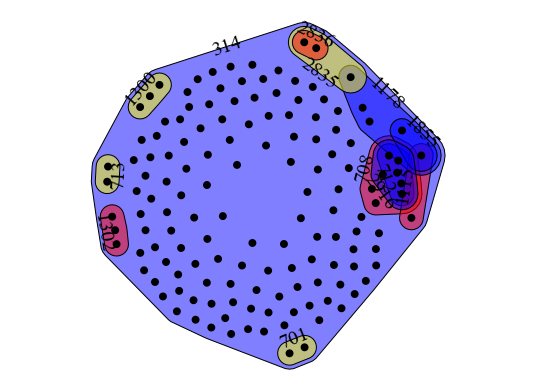

In [108]:
import numpy as np
import sys
sys.path.append("/Users/nus/hg-core-decomposition/HyperNetX")

import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import random
scenes = {i: v_densestE[i] for i in range(len(v_densestE))}
labels = {}
j = 0
for i,row in human_df[(human_df.ComplexID.isin(sub_complexes_volD))].iterrows():
    # labels[j] = row['FunCat description']
    # txt = row['ComplexName']
    # if 'complex' in txt:
    #     txt = ' '.join([i for i in txt.split() if i.strip() not in 'complex'])
    #     labels[j] = txt
    # else:
    #     labels[j] = txt 
    labels[j] = i
    j+=1
print(labels)
# scenes = {i: deg_densestE[i] for i in range(len(deg_densestE))}
H = hnx.Hypergraph(scenes)

font = {
        'family': 'Times New Roman',
        'weight': 'normal',
        'size': 25
        }
plt.rc('font',**font)
cmap = plt.cm.viridis
alpha = .5


# sizes = np.array([1.0/random.randint(1,20) for e in H.edges()])
# norm = plt.Normalize(sizes.min(), sizes.max())

# fig, (ax1,ax2) = plt.subplots(1,2)
fig, ax1 = plt.subplots(figsize = (8,6))
# ax1 = fig.add_subplot(1,1,1)

edge_d = {'fontsize':20}
hnx.draw(H, ax = ax1,
                 label_alpha=0,
                 edges_kwargs={
                     'facecolors': [(0,0,1,alpha),  (1, 1, 0, alpha), (1,0,0, alpha)],
                     'edgecolors': 'black',
                     'linewidths': 1
                 },
                 nodes_kwargs = {
                    #  'node_radius': 2,
                     'facecolors': (0,0,0,1)
                },
                layout_kwargs = {'seed': 17},
                with_edge_labels = True, 
                with_node_labels = False,
                node_radius = 1,
                edge_labels = labels,
                edge_labels_kwargs = edge_d)
plt.tight_layout()
plt.savefig('protein.pdf')

In [63]:

subvol = human_df[(human_df.ComplexID.isin(sub_complexes_volD))]
subvol['hyperedge'] = subvol.index.copy()
# subvol[['hyperedge', 'ComplexName','GO description','Disease comment']].head(15)
subvol[['ComplexName','Disease comment']].to_csv('disease_vold.csv')
# subvol[['ComplexName','GO description','FunCat description']].to_csv('nbr_densest_proteinComplexes.csv')

/var/folders/zt/vkwbklhn3n32tgkp7ysv4rrr0000gn/T/ipykernel_76687/3022592681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subvol['hyperedge'] = subvol.index.copy()


In [26]:
subdeg = human_df[(human_df.ComplexID.isin(sub_complexes_degD))]
subdeg[['ComplexName','GO description']]

,ComplexName,GO description
1272,GNAS-GNB1-GNG2 complex,signaling
3742,GNAI1-GNGT1-GNB1 complex,None
3743,GNAI1-GNB2-GNGT1 complex,None
3744,GNAI1-GNB3-GNGT1 complex,None
3745,GNAI1-GNB4-GNGT1 complex,None
...,...,...
3932,GNAS-L-GNB1-GNG13 complex,None
3933,GNAS-L-GNB2-GNG13 complex,None
3934,GNAS-L-GNB3-GNG13 complex,None
3935,GNAS-L-GNB4-GNG13 complex,None


In [16]:
# for e in H.edges:
#     print(e)

In [65]:
human_df[(human_df.ComplexID.isin(sub_complexes_degD))].to_csv('degree_densest.csv')
# for i,row in human_df[(human_df.ComplexID.isin(sub_complexes_degD))].iterrows():
#     # print(row['ComplexID'], row['subunits(UniProt IDs)'] ,row['Complex comment'])
#     print(row['ComplexID'],'|',row['FunCat description'],'|',row['Disease comment'])
#     # print(row['Disease comment'])
#     print('---------------')

In [59]:
# human_df[(human_df.ComplexID.isin(sub_complexes_volD))]
for i,row in human_df[(human_df.ComplexID.isin(sub_complexes_volD))].iterrows():
# #     # print(row['ComplexID'], row['subunits(UniProt IDs)'] ,row['Complex comment'])
#     # print(row['ComplexID'],'|',row['subunits(UniProt IDs)'],'|',row['FunCat description'],'|',row['Disease comment'])
    print(row['ComplexID'],'|',row['subunits(UniProt IDs)'],'|',row['FunCat description'],'|',row['Disease comment'])
    print() 
    print('---------------')

351 | O00425;O00571;O14776;O15042;O15355;O43143;O43172;O43290;O43395;O43447;O43660;O43670;O43719;O43809;O60231;O60306;O60508;O75400;O75533;O75643;O75934;O75937;O75940;O94906;O95232;O95391;O95400;O95926;P08579;P08621;P09012;P09234;P09661;P11940;P14678;P17844;P26368;P38919;P41223;P42285;P49756;P52298;P55081;P55769;P61326;P62304;P62306;P62308;P62310;P62312;P62314;P62316;P62318;P62995;P83876;P84103;Q01081;Q01130;Q05519;Q07955;Q08170;Q08211;Q09161;Q12874;Q13123;Q13242;Q13243;Q13247;Q13356;Q13435;Q13523;Q13573;Q13769;Q13838;Q14011;Q14498;Q14562;Q15007;Q15029;Q15287;Q15393;Q15427;Q15428;Q15459;Q15637;Q16629;Q16630;Q2TAY7;Q4ZG51;Q53GS9;Q69YN4;Q6I9Y2;Q6P2Q9;Q7L014;Q86V81;Q86W42;Q8IYB3;Q8NI27;Q8WUQ7;Q8WVK2;Q8WWY3;Q8WYA6;Q92620;Q92841;Q96BP3;Q96DF8;Q96DI7;Q96FV9;Q96I25;Q96J01;Q96T37;Q96T58;Q99459;Q99633;Q9BQ61;Q9BRD0;Q9BUQ8;Q9BXP5;Q9BZJ0;Q9H2H8;Q9HCE1;Q9HCG8;Q9HCS7;Q9NW64;Q9NYV4;Q9P013;Q9UBB9;Q9UHX1;Q9UJV9;Q9UK45;Q9UKV3;Q9ULR0;Q9UMS4;Q9UNP9;Q9UQ35;Q9Y2W2;Q9Y333;Q9Y3B4;Q9Y3C6;Q9Y4Z0;Q9Y5B6;Q9Y5S9;

Core analysis
-------

In [66]:
core_file = '/Users/nus/hg-core-decomposition/data/output/result_protein.csv'
core_df = pd.read_csv(core_file,header = None)
core_df.columns = ['algo', 'dataset','num_threads', 'core', 'param_s',  'execution time', 'bucket update time', 'neighborhood call time', 'degree call time', 'num bucket update', 'num neighborhood computation', 'num degree computation', 'subgraph computation time', 'num subgraph call', 'init time', 'outerloop time', 'total iteration', 'inner iteration', 'core_correction time', 'h_index_time', 'tau', 'core_correction_volume', 'sum_core_correction_volume', 'reduction_in_hhat', 'memory taken']
core_df.head()

,algo,dataset,num_threads,core,param_s,execution time,bucket update time,neighborhood call time,degree call time,num bucket update,...,outerloop time,total iteration,inner iteration,core_correction time,h_index_time,tau,core_correction_volume,sum_core_correction_volume,reduction_in_hhat,memory taken
0,naive_nbr,protein,4.0,"{'1196': 1, '2344': 1, '1087': 1, '1048': 1, '...",1.0,0.149409,0.006433,0.105696,0.0,7038.0,...,0.14211,7038.0,7038.0,0.0,0.0,0.0,[],0.0,[],85.300781


In [67]:
cores = core_df.core.iloc[0]
import ast 
cores = ast.literal_eval(cores)
sorted_cores = sorted(cores.items(), key = lambda x: x[1],reverse = True)
innermostcore_index = sorted_cores[0][1]
innermost_core = [x for x in sorted_cores if x[1]==innermostcore_index]
print(innermost_core)

[('2062', 142), ('1308', 142), ('939', 142), ('2479', 142), ('3614', 142), ('3093', 142), ('898', 142), ('3174', 142), ('2842', 142), ('437', 142), ('2856', 142), ('1168', 142), ('3233', 142), ('317', 142), ('2171', 142), ('670', 142), ('3022', 142), ('2749', 142), ('135', 142), ('1691', 142), ('3597', 142), ('50', 142), ('2562', 142), ('2460', 142), ('2258', 142), ('859', 142), ('76', 142), ('3605', 142), ('1964', 142), ('2415', 142), ('1772', 142), ('994', 142), ('1069', 142), ('3219', 142), ('541', 142), ('970', 142), ('2267', 142), ('7', 142), ('3383', 142), ('904', 142), ('3541', 142), ('745', 142), ('3192', 142), ('2028', 142), ('827', 142), ('57', 142), ('3530', 142), ('1978', 142), ('220', 142), ('1591', 142), ('1335', 142), ('3076', 142), ('1138', 142), ('1699', 142), ('838', 142), ('3116', 142), ('1629', 142), ('2675', 142), ('2722', 142), ('1696', 142), ('346', 142), ('2375', 142), ('2990', 142), ('2012', 142), ('3504', 142), ('131', 142), ('730', 142), ('275', 142), ('1826'

In [68]:
core_proteins = [int(i[0]) for i in innermost_core]
coreprotein_names = retrieve_list_gene_name(core_proteins)
print(coreprotein_names)

['NDUFC1', 'HNF4A', 'ERLEC1', 'PRPF4', 'ZP3', 'STK39', 'ELP4', 'TAF9B', 'SEC23A', 'CD8A', 'SEPHS1', 'GNG2', 'THBS2', 'BRD7', 'NUP107', 'CTNNB1', 'SPACA3', 'RPS13', 'APH1A', 'LRRC8C', 'ZFYVE27', 'ADRB2', 'RAB11B', 'PRKAR2A', 'PDE4B', 'EIF2B2', 'AKT2', 'ZNF281', 'MT-CO2', 'PPIF', 'MCM5', 'FAM96B', 'FNIP2', 'TFIP11', 'CHUK', 'EXOSC6', 'PDRG1', 'ABCB1', 'TUBG1', 'ENAH', 'WIPF1', 'DHDDS', 'TBX18', 'NCOA6', 'E2F1', 'AGO4', 'WDR48', 'MTNR1B', 'ATP5I', 'KLHL13', 'HRAS', 'ST13', 'GJB3', 'LSM3', 'EDN1', 'SUCLG2', 'LAMC1', 'RNF40', 'RPL36A', 'LSM10', 'C2orf49', 'POLB', 'SNRNP40', 'NASP', 'VPS72', 'APBB1', 'DDX42', 'BCL3', 'MGAT5', 'KIAA1468', 'BAZ2A', 'HOOK1', 'IFT81', 'IL2RG', 'SRPK1', 'MRPL13', 'ISY1', 'USP22', 'SNRPA1', 'ELP6', 'MRPS18A', 'TBC1D7', 'MIC13', 'RANBP9', 'RAN', 'BIRC3', 'PTMA', 'CACTIN', 'MXD1', 'RPL8', 'GSKIP', 'N4BP2', 'TLE4', 'MRPL15', 'H3F3A', 'NCBP1', 'MRPL55', 'MRPL1', 'CSF3R', 'GRWD1', 'COMMD8', 'API5', 'SSTR2', 'CCNH', 'NCBP2', 'GLRX3', 'CHRNB2', 'VPRBP', 'TNFRSF1A', 'SPG1

In [69]:
sub_complexes_s = retrieve_stronglyinduced_complexes(coreprotein_names, human_hg)
print('Strongly induced core subcomplexes :', sub_complexes_s)
sub_complexes_w = retrieve_weeklyinduced_complexes(coreprotein_names, human_hg)
print('Weekly induced core subcomplexes :', sub_complexes_w)

Strongly induced core subcomplexes : [775, 5760, 6100, 6562]
Weekly induced core subcomplexes : [43, 49, 87, 107, 142, 143, 155, 178, 304, 305, 306, 308, 315, 320, 324, 351, 362, 387, 393, 430, 438, 445, 468, 469, 471, 475, 485, 486, 492, 493, 517, 520, 521, 522, 561, 562, 563, 605, 639, 641, 668, 672, 687, 775, 788, 799, 826, 878, 924, 1007, 1008, 1028, 1030, 1045, 1054, 1067, 1069, 1070, 1085, 1086, 1091, 1093, 1095, 1096, 1101, 1106, 1113, 1114, 1123, 1149, 1150, 1165, 1174, 1176, 1181, 1183, 1190, 1191, 1194, 1250, 1257, 1259, 1261, 1332, 1347, 1380, 1385, 1386, 1400, 1488, 1515, 1539, 1551, 1552, 1554, 1612, 1614, 1615, 1617, 1618, 1619, 1620, 1700, 1737, 1816, 1978, 2055, 2100, 2101, 2105, 2118, 2121, 2124, 2198, 2235, 2236, 2256, 2258, 2318, 2342, 2364, 2428, 2510, 2511, 2603, 2657, 2727, 2734, 2735, 2755, 2757, 2811, 2860, 2919, 2936, 2939, 2998, 3004, 3008, 3026, 3027, 3031, 3051, 3054, 3055, 3067, 3071, 3075, 3098, 3099, 3121, 3124, 3138, 3155, 3158, 3159, 3160, 3166, 3176, 3

In [76]:
human_df[(human_df.ComplexID.isin(sub_complexes_s))].head(20)

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name),Subunits comment,PubMed ID,Complex comment,Disease comment,SWISSPROT organism,subunits(Gene name syn),subunits(Protein name)
4029,7319,CLEC4E-FCER1G complex,Human,MINCLE-Fc epsilon RI gamma complex,None,P30273;Q9ULY5,2207;26253,MI:0096-pull down,GO:0050776;GO:0038094,regulation of immune response;Fc-gamma recepto...,None,None,FCER1G;CLEC4E,None,28751441,None,None,Homo sapiens (Human);Homo sapiens (Human),"None;CLECSF9,MINCLE",High affinity immunoglobulin epsilon receptor ...


In [28]:
for i,row in human_df[(human_df.ComplexID.isin(sub_complexes_s))].iterrows():
    print(row['ComplexID'], row['subunits(UniProt IDs)'] ,row['Complex comment'])
    print('---------------')
#     print(row)

7319 P30273;Q9ULY5 None
---------------


In [77]:
for i,row in human_df[(human_df.ComplexID.isin(sub_complexes_s))].iterrows():
#     [['ComplexID','subunits(UniProt IDs)','FunCat description']]
#     print(row['ComplexID'], row['subunits(UniProt IDs)'] ,row['FunCat description'])
    print(row['ComplexID'],row['FunCat description'])

7319 None


In [70]:
_tmp = []
for i,row in human_df.iterrows():
    if 'RNA binding' in row['FunCat description']:
        _tmp.append(row['ComplexID'])
print(len(_tmp))
for i,row in human_df[(human_df.ComplexID.isin(_tmp))].iterrows():
    print(row['ComplexID'],row['FunCat description'])

71
123 RNA degradation;rRNA processing;RNA binding;nucleus
281 transcription elongation;transcription repression;RNA binding;protein binding;nucleus
335 RNA binding;RNA transport;nucleus
351 splicing;RNA binding;nucleus
533 assembly of protein complexes;protein binding;RNA binding;nucleus
561 control of mRNA stability;RNA binding;cytoplasm
562 splicing;RNA binding;cytoplasm;nucleus
740 control of mRNA stability;translational control;RNA binding;RNA transport;nuclear transport;cytoplasm;nucleus
744 control of mRNA stability;translational control;RNA binding;RNA transport;nuclear transport;cytoplasm;nucleus
754 control of mRNA stability;translational control;RNA binding;RNA transport;nuclear transport;cytoplasm;nucleus
755 control of mRNA stability;translational control;RNA binding;RNA transport;nuclear transport;cytoplasm;nucleus
769 control of mRNA stability;translational control;RNA binding;ATP binding;RNA transport;nuclear transport;cytoplasm;nucleus
770 RNA binding;RNA transport;nuc